## <p style="text-align: right;"> &#9989; Put your name here</p>

# Day 11 Pre-Class Assignment: Object Oriented Programming (OOP) and Project Brainstorming

In this pre-class assignment we are going to talk about about Object Oriented Programming.  Although we have not talked about it directly, all variables in Python are objects. An object is a combination of variables, functions, and data structures.  

The combinations are not random.  The goal in object oriented programming is to create an object that contains all of the data needed by the object and all of the functions that are associated with the object or "act" on the object. 

As you review OOP, you'll spend a bit of time thinking about possible semester project ideas.

# Goals for today's pre-class assignment

1. Introduction Videos to Object Oriented Programming (OOP)
1. OOP Example
1. Brainstorm project ideas
1. Assignment Wrap-up

## Assignment instructions
**This assignment is due by 11:59 p.m. the day before class** and should be uploaded into the appropriate "Pre-class assignments" dropbox folder in the Desire2Learn website.

---

# 1. Introduction Videos to Object Oriented Programming (OOP)
Watch and follow along in the following video and answer the questions. Ignore the fact that apparently its perfectly acceptable to use "orientated" in the UK...

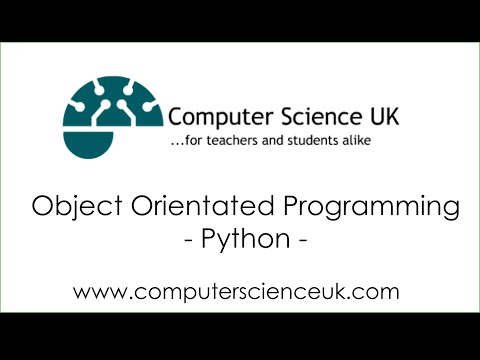

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("3dA4XE6l7YI",width=640,height=360)

**Question**: This video mentions three things that are needed to describe a class. What are these three things (Hint: the first one is a class name. I included this one to get you started).

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

1. It's Name
1. It's Attributes (What it looks like)
1. It's Methods (What it does)

Watch the next video and complete the tasks and questions below. Hopefully you're not currently feeling narky!

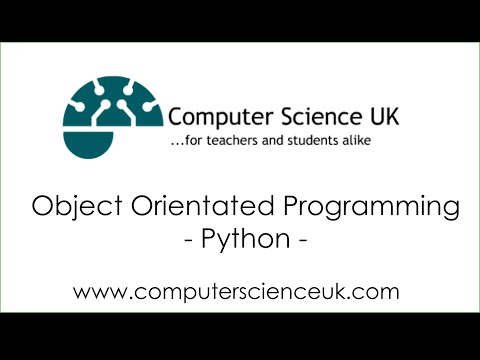

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("1j9BFXsZvp0",width=640,height=360)

# 2. OOP Example - Mesh Free Particle Methods

When simulating environment researchers often break the environment into discrete nodes based on location.  Each node is connected to it's neighbors and form a network often called a **mesh** (see image below).   At each simulated time step the dynamics of the environment are calculated independently at each node. Then between each time step the properties of the environment (such as energy, mass or forces) are transfered across the borders between nodes.   

<img src="http://clasp-research.engin.umich.edu/groups/admg/ipam_ws2_barotropic_wave.jpg" width="25%">
<p style="text-align: right;">
Example Mesh based Image from http://clasp-research.engin.umich.edu/groups/admg/education.php
</p>

In contrast, **mesh free particle methods** do not require connection between nodes of the simulation domain but instead track the environment properties as distinct objects (called particles) that typically move within the environment.  There are many difficult types of problems that can be solved easily using Mesh free methods.  However, they can sometimes been much more difficult to program and take more computing power. 

<img src="http://ascelibrary.org/cms/attachment/44204/1020646/1.gif" width="75%">
<p style="text-align: right;">
Mesh vs particle methods from http://clasp-research.engin.umich.edu/groups/admg/education.php
</p>

Consider the following, very simple, particle simulation written using Object Oriented Programming that just looks at position and velocity. 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import random 

class particle():
    """
    Creates a particle object
    
    """
    def __init__(self):
        """
        Initializes a random x, y position and x, y velocity
        
        """
        self.x = random.random()
        self.y = random.random()
        self.dx = random.random()*0.1
        self.dy = random.random()*0.1
    
    def increment_time(self):
        """
        Change the position of the particle based on its current velocity
        
        Will keep the particles in the positive domain
        """
        self.x = self.x + self.dx
        self.y = self.y + self.dy
        if (self.x < 0):
            self.x = abs(self.x)
            self.dx = -1 * self.dx
        if (self.y < 0):
            self.y = abs(self.y)
            self.dy = -1 * self.dy
        if (self.x > 1):
            self.x = 1 - (self.x-1)
            self.dx = -1 * self.dx
        if (self.y > 1):
            self.y = 1 -(self.y-1)
            self.dy = -1 * self.dy
    
    
    def draw(self):
        """
        Draws the particles on a matplotlib figure
        
        """
        plt.scatter(self.x, self.y)
        plt.plot([self.x-self.dx, self.x], [self.y-self.dy, self.y])
        plt.axis([0, 1, 0, 1])
    

&#9989; DO THIS - The above class is missing it's DocString. Read though the code and add an appropriate dotstring to describe the class. Here is some information about what DocStrings are and why they are useful: https://www.pythonforbeginners.com/basics/python-docstrings 

A docstring might look like:

```
'''
This function does things.
'''
```

Of course, you'll need to be a bit more descriptive than that...

The following code creates two instances (objects) of the above partical class using the constructor method:

In [5]:
p1 = particle()
p2 = particle()

**Question**: Look at the constructor function in the above code. It is initializing four object variables. What are the variables names? 

<font size=8 color="#009600">&#9998;</font> They are x, y, dx, and dy

The dot '.' notation is used to call member functions of an object. For example, the following code calls the `draw` function.

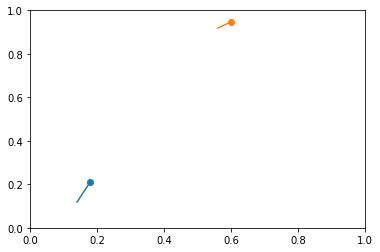

In [6]:
p1.draw()
p2.draw()

The increment_time() function in the above code updates the position by adding the contribution of the velocity (dx,dy) to the current position of the particle.  If we run the increment_time function in a loop we can see how the particles change position in time.  

The following code calls the increment_time and draw methods in a loop to animate the figure:

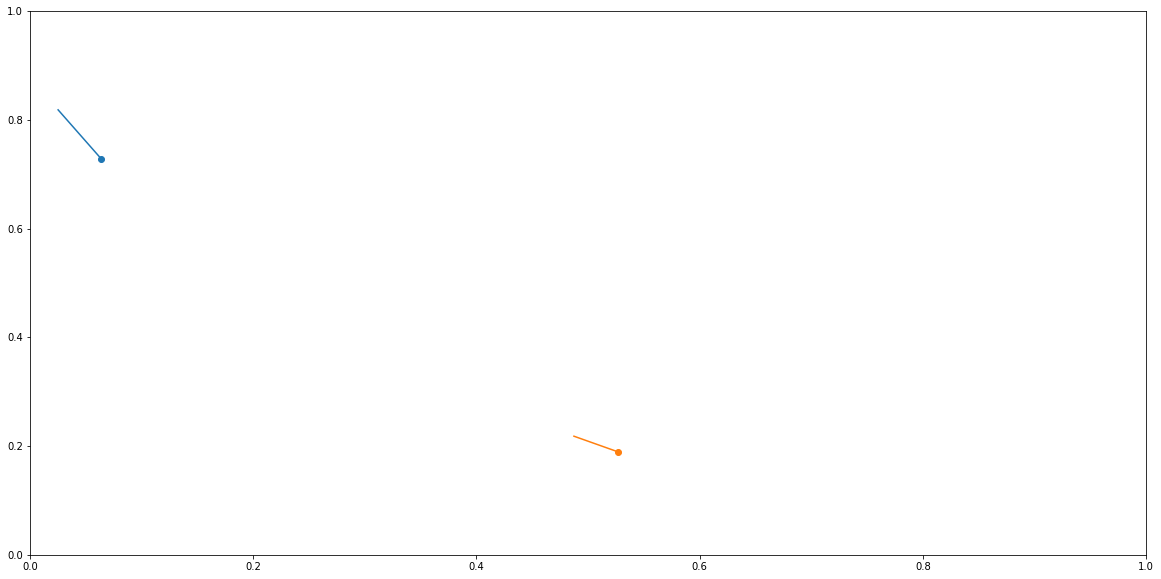

<Figure size 1440x720 with 0 Axes>

In [7]:
from IPython.display import display, clear_output
import time  
fig, ax = plt.subplots(figsize=(20,10))
for i in range(100):
    p1.increment_time();
    p2.increment_time();
    p1.draw();
    p2.draw();
    
    # Animation part (doesn't change)
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    time.sleep(0.0001)      # Sleep for half a second to slow down the animation


&#9989; DO THIS - Copy and paste the contents from the above cell and put it in the next cell.  Modify the code to create 100 instances of the particle class and animate using the `increment_time` and `draw` methods. If done correctly you should see 100 dots bouncing around inside the simulation. 

**Note:** Because a particle is an "object" you can create a list or dictionary of particles just like you can create a list or dictionary of anything else in python. 

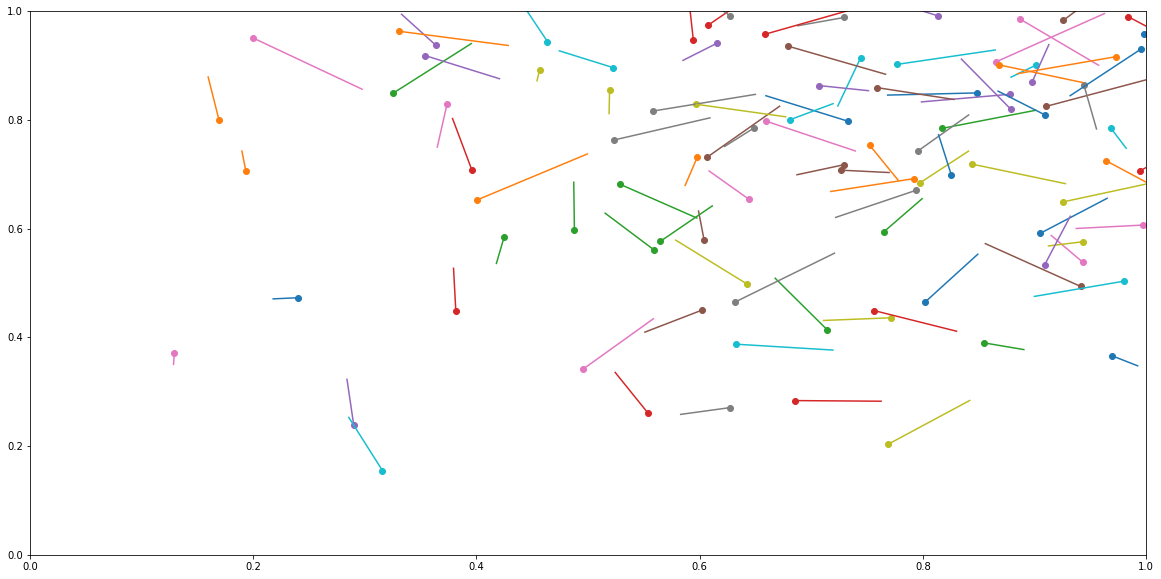

<Figure size 1440x720 with 0 Axes>

In [20]:
from IPython.display import display, clear_output
import time

particleList = []
numParticles = 100

for n in range(numParticles):
    particleList.append(particle())

fig, ax = plt.subplots(figsize=(20,10))
for i in range(10):
    for j in particleList:
        j.increment_time();
        j.draw();
    
    # Animation part (doesn't change)
    clear_output(wait = True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    # Sleep for half a second to slow down the animation

---
# 3. Project Brainstorming

For the last part of this assignment, we would like you to start thinking about your semester project.  Ideally, your project will incorporate the concepts that you have been learning and will eventually learn in the course. You can find details for what is expected of you for the semester projects in the "CourseMaterials" folder in your Assignments repository in the fie "semester_project_details.pdf".

Right now the goal is to just come up with project ideas that sound interesting to you! Later, we'll work together to shape them into concepts that fit well within the bound of the course!

You may also find it useful to consider the following examples from previous semesters:

### Example 1: Agent based spread of disease
This group developed an agent based model to study the spread of a disease. The model consisted of people that lived, worked and went to school.  The interaction between the agents determined the likelihood of the spread of the virus. 

<img src="https://imgur.com/c5vTkmu.jpg" width="600px">


### Example 2: Planetary Habitable_zone
This project developed an API (advanced programming interface) to existing online databases of exoplanets (planets outside of our solar system). The user could query the database and the program would generate an idealized picture of the solar system and show if the planet is inside the "goldilock zone." This is the zone where a planet is likely to sustain liquid water.  

<img src="https://i.imgur.com/5iTL9DF.png" width="600px">
<img src="https://imgur.com/OrmmXvK.png" width="600px">

### Example 3: Star Spectral Analysis
This project developed an algorithm to automatically categorize stars based on their visible spectral signatures.  This categorization process is often difficult and the students wanted to see if a model could be generated using a learning algorithm.

<img src="https://i.imgur.com/5EdeqyV.png" width="600px">


### Example 4: Image Classification of Filamentous Fungi
This project involved the creation of a image classifier using machine learning to classify images of fungi to the correct phylum based on microscope images. It was intended to improve the efficiency of identifying unknown fungi isolated from soil. Currently there are 248 images in the database.

<img src="https://i.imgur.com/zH55gPA.png" width="900px">


**&#9989;  Do This:**  Brainstorm ideas you have for projects.


<font size=8 color="#009600">&#9998;</font> 
- Effect of natural disasters on the evolution of species, an 

**Once you've come up with some ideas for project, fill out the following survey so that your ideas can be compiled into list of possible ideas for the entire class**. The combined list will be used to seed ideas that will eventually lead to semester projects!

In [21]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://docs.google.com/forms/d/e/1FAIpQLSeqGsjNuiXy7s0glrt2KEzXaLcxv5Iuk5EuRXhY02fT6BpQWQ/viewform?usp=sf_link" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

----
# 4. Assignment wrap-up

That's it!

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [22]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse202-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your name in the first cell).

&#169; Copyright 2018,  Michigan State University Board of Trustees